In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
train.head()

min_max_values = train.agg([np.min, np.max])
print(min_max_values)

/var/folders/6s/jr7682b91l96_19cy2sc2kvw0000gn/T/ipykernel_24863/4223882209.py:8: FutureWarning: The provided callable <function min at 0x1145c11c0> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_max_values = train.agg([np.min, np.max])
/var/folders/6s/jr7682b91l96_19cy2sc2kvw0000gn/T/ipykernel_24863/4223882209.py:8: FutureWarning: The provided callable <function max at 0x1145c1080> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  min_max_values = train.agg([np.min, np.max])


            id  vendor_id      pickup_datetime     dropoff_datetime  \
min  id0000001          1  2016-01-01 00:00:17  2016-01-01 00:03:31   
max  id4000000          2  2016-06-30 23:59:39  2016-07-01 23:02:03   

     passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
min                0       -121.933342        34.359695        -121.933304   
max                9        -61.335529        51.881084         -61.335529   

     dropoff_latitude store_and_fwd_flag  trip_duration  
min         32.181141                  N              1  
max         43.921028                  Y        3526282  


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


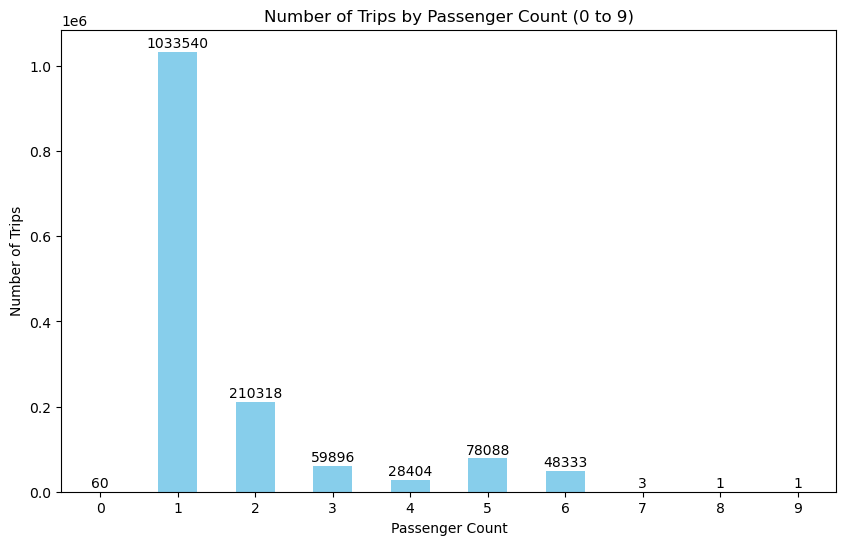

In [4]:
# Count the number of trips for each passenger count
passenger_count_distribution = train['passenger_count'].value_counts().sort_index()

# Filter for passenger counts from 0 to 9
passenger_count_distribution = passenger_count_distribution.loc[0:9]

# Plot the distribution
plt.figure(figsize=(10, 6))
passenger_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Passenger Count (0 to 9)')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
# Annotate the bars with the number of trips
for index, value in enumerate(passenger_count_distribution):
    plt.text(index, value + max(passenger_count_distribution) * 0.01, str(value), ha='center', fontsize=10)
plt.show()

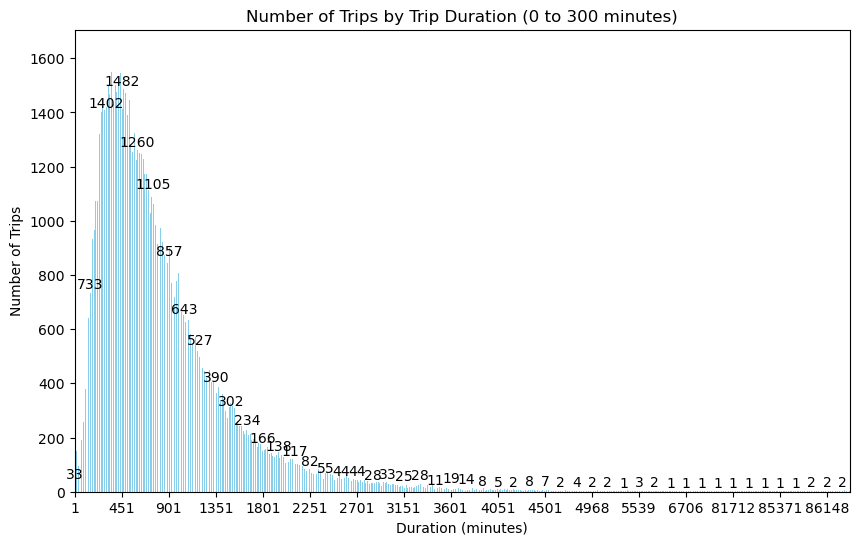

In [26]:
passenger_count_distribution = train['trip_duration'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
passenger_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Trip Duration (0 to 300 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.xticks(np.arange(0, len(passenger_count_distribution), 450),
           passenger_count_distribution.index[::450],
           rotation=0)

for index, value in enumerate(passenger_count_distribution):
    if index % 150 != 0:
        continue
    plt.text(index, value + max(passenger_count_distribution) * 0.01, str(value), ha='center', fontsize=10)
plt.show()

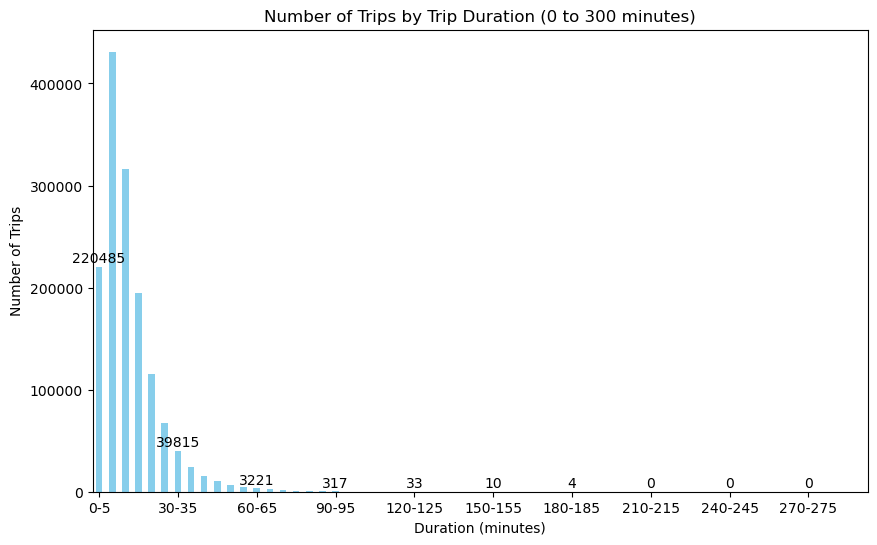

In [19]:
train['trip_duration_min'] = train['trip_duration'] / 60
train['trip_duration_hour'] = train['trip_duration_min'] / 60


bins = np.arange(0, 300, 5)
labels = [f"{i}-{i+5}" for i in bins[:-1]]

# Bin the data and count trips per interval
passenger_count_distribution = pd.cut(train['trip_duration_min'], bins=bins, labels=labels, right=False).value_counts().sort_index()


#passenger_count_distribution = passenger_count_distribution.groupby(np.arange(len(passenger_count_distribution)) // 10).sum()

# Filter for passenger counts from 0 to 9
# passenger_count_distribution = passenger_count_distribution.loc[0:9]

# Plot the distribution
plt.figure(figsize=(10, 6))
passenger_count_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Trip Duration (0 to 300 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.xticks(np.arange(0, len(passenger_count_distribution), 6),
           passenger_count_distribution.index[::6],
           rotation=0)
# Annotate the bars with the number of trips
# for index, value in enumerate(passenger_count_distribution):
    # plt.text(index, value + max(passenger_count_distribution) * 0.01, str(value), ha='center', fontsize=10)
for index, value in enumerate(passenger_count_distribution):
    if index % 6 != 0:
        continue
    plt.text(index, value + max(passenger_count_distribution) * 0.01, str(value), ha='center', fontsize=10)
plt.show()

In [5]:
train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

### store_and_fwd_flag

This flag shows if the trip was saved in the vehicle first because there was no internet.

- **Y** = saved and sent later  
- **N** = sent right away


In [51]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_day'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

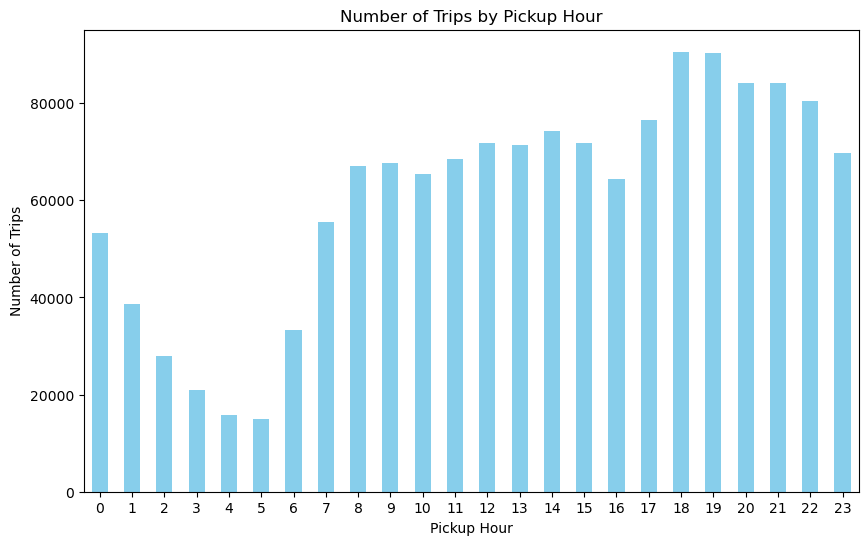

In [29]:
# Calculate the number of trips for each pickup hour
pickup_hour_counts = train['pickup_hour'].value_counts().sort_index()

# Plot the distribution of pickup_hour
plt.figure(figsize=(10, 6))
pickup_hour_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

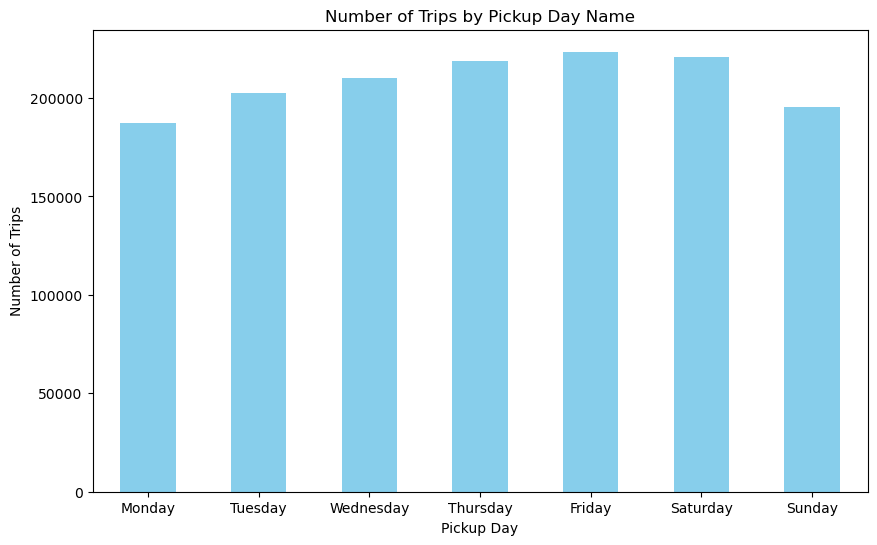

In [31]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train['pickup_day_name'] = train['pickup_day'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
pickup_day_counts = train['pickup_day_name'].value_counts().reindex(weekday_labels)

plt.figure(figsize=(10, 6))
pickup_day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Pickup Day Name')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


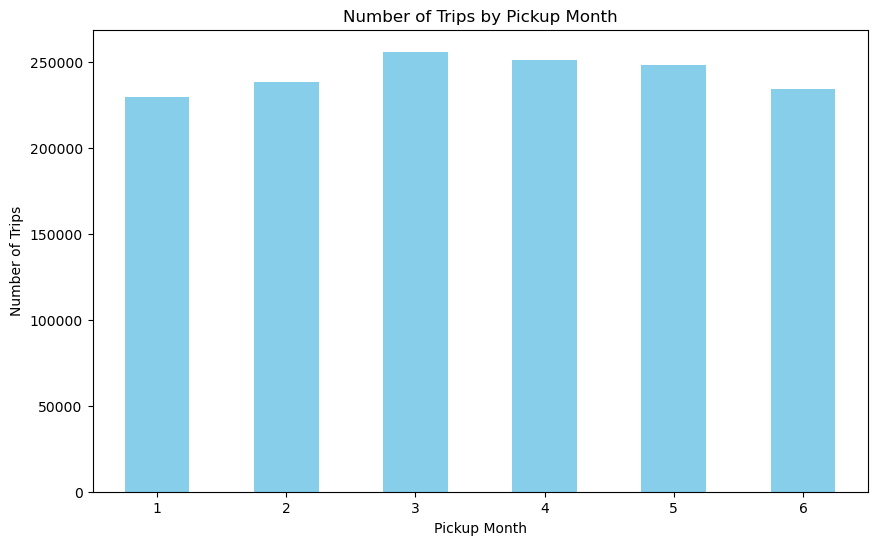

In [49]:
# pickup_hour_counts = train['pickup_month'].value_counts().sort_index()

month_labels = ['January', 'February', 'March', 'April', 'May', 'June']
train['pickup_month_name'] = train['pickup_month'].map({
    1: 'January', 2: 'February',
    3: 'March', 4: 'April', 5: 'May', 6: 'June'
})
pickup_day_counts = train['pickup_month_name'] # .value_counts().reindex(weekday_labels)

# Plot the distribution of pickup_month
plt.figure(figsize=(10, 6))
pickup_hour_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Pickup Month')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

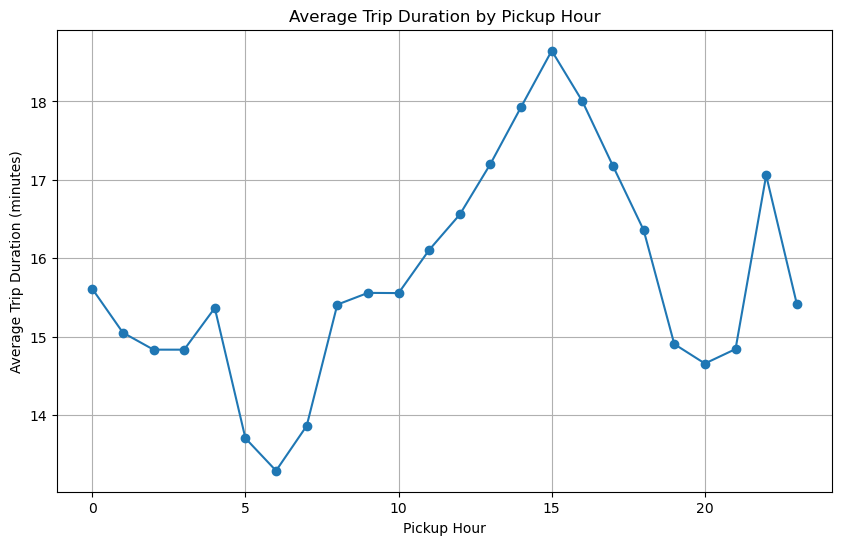

In [34]:
hourly_avg = train.groupby('pickup_hour')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()


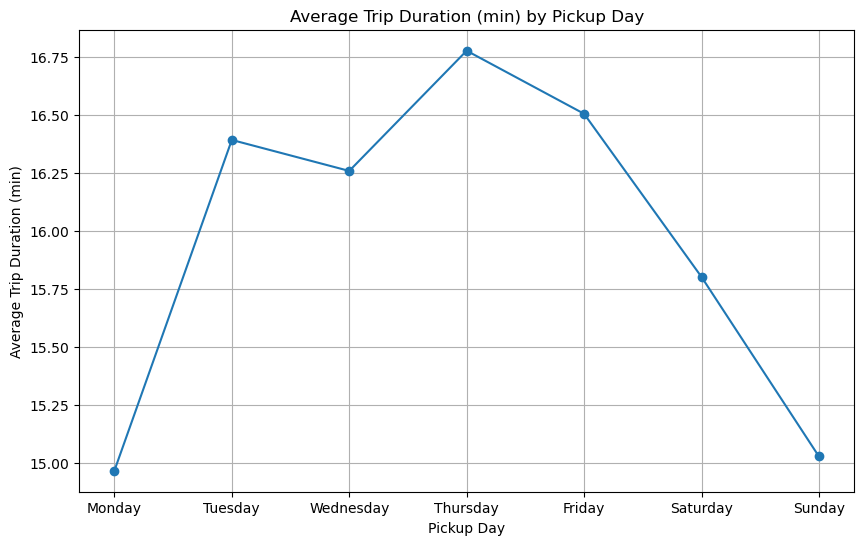

In [35]:
avg_by_day = train.groupby('pickup_day_name')['trip_duration_min'].mean()

avg_by_day = avg_by_day.reindex(weekday_labels)
plt.figure(figsize=(10,6))
plt.plot(avg_by_day.index, avg_by_day, marker='o', linestyle='-')
plt.title('Average Trip Duration (min) by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Average Trip Duration (min)')
plt.grid(True)
plt.show()


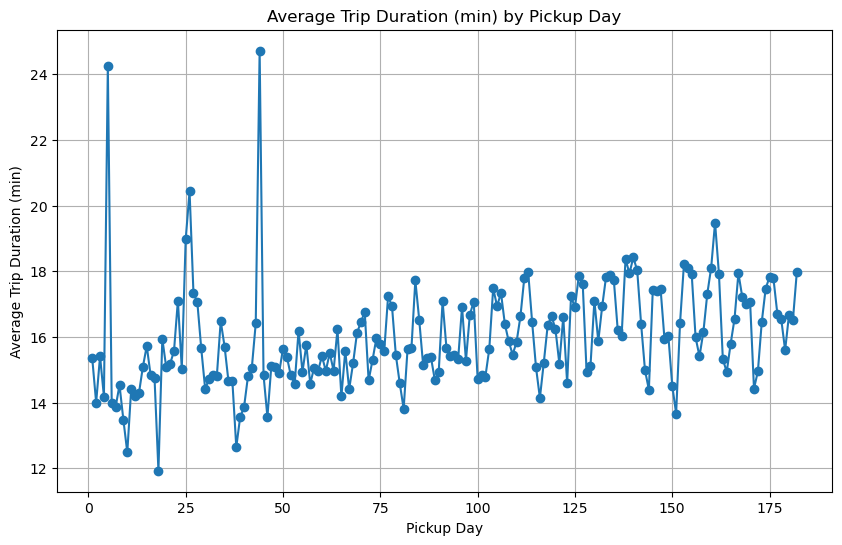

In [58]:
avg_by_day = train.groupby('day_of_year')['trip_duration_min'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_by_day.index, avg_by_day, marker='o', linestyle='-')
plt.title('Average Trip Duration (min) by Pickup Day')
plt.xlabel('Pickup Day')
plt.ylabel('Average Trip Duration (min)')
plt.grid(True)
plt.show()


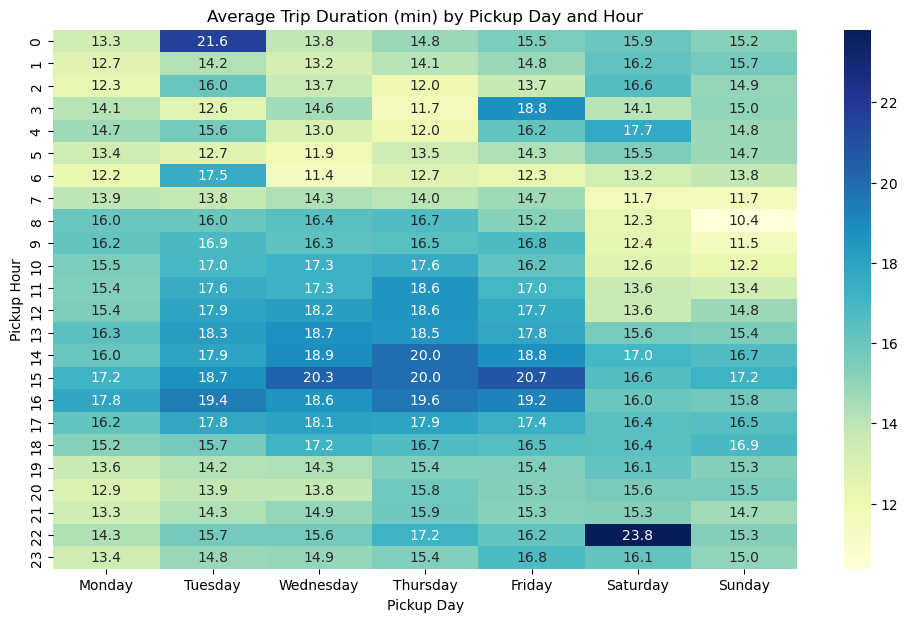

In [36]:
import seaborn as sns

hourly_avg = train.groupby(['pickup_day_name', 'pickup_hour'])['trip_duration_min'].mean()
# Pivot the series so that rows represent pickup_hour and columns represent pickup_day_name
heatmap_data = hourly_avg.unstack(level=0)

# Optionally, reorder the columns based on weekday_labels if defined
if 'weekday_labels' in globals():
    heatmap_data = heatmap_data[weekday_labels]

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Trip Duration (min) by Pickup Day and Hour")
plt.xlabel("Pickup Day")
plt.ylabel("Pickup Hour")
plt.show()


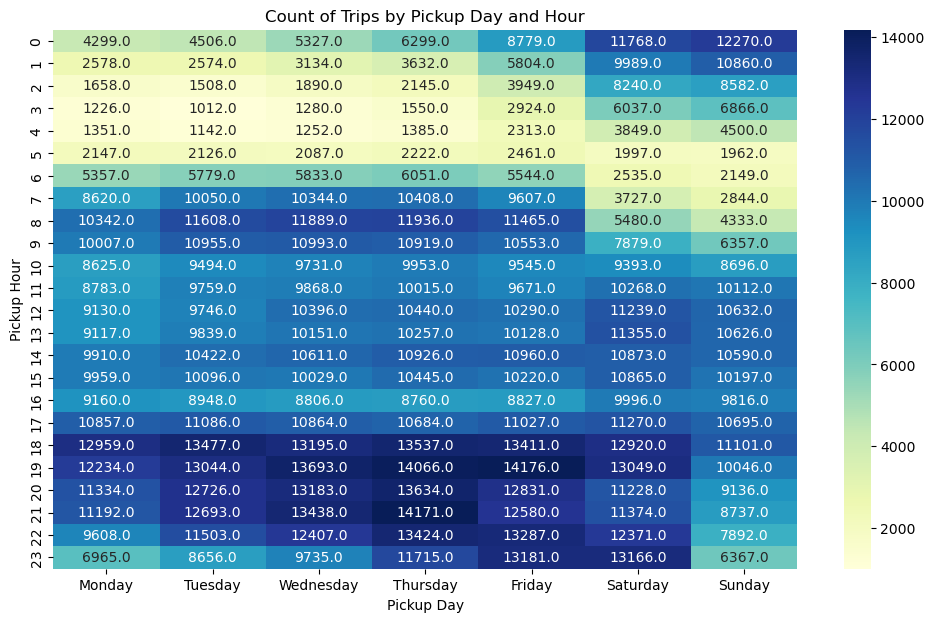

In [38]:
import seaborn as sns

hourly_avg = train.groupby(['pickup_day_name', 'pickup_hour'])['trip_duration_min'].count()
# Pivot the series so that rows represent pickup_hour and columns represent pickup_day_name
heatmap_data = hourly_avg.unstack(level=0)

# Optionally, reorder the columns based on weekday_labels if defined
if 'weekday_labels' in globals():
    heatmap_data = heatmap_data[weekday_labels]

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Count of Trips by Pickup Day and Hour")
plt.xlabel("Pickup Day")
plt.ylabel("Pickup Hour")
plt.show()


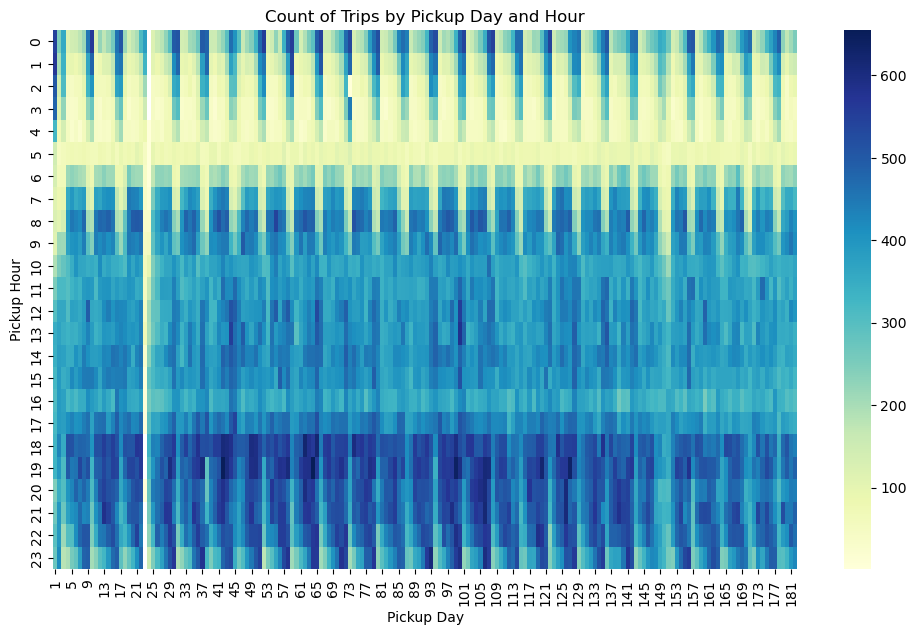

In [56]:
import seaborn as sns

hourly_avg = train.groupby(['day_of_year', 'pickup_hour'])['trip_duration_min'].count()
# Pivot the series so that rows represent pickup_hour and columns represent pickup_day_name
heatmap_data = hourly_avg.unstack(level=0)


plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=False, fmt=".1f", cmap="YlGnBu")
plt.title("Count of Trips by Pickup Day and Hour")
plt.xlabel("Pickup Day")
plt.ylabel("Pickup Hour")
plt.show()